• DOMAIN: Semiconductor manufacturing process
• CONTEXT: A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a
specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise.
Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then
feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to
learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and
trying out different combinations of features, essential signals that are impacting the yield type can be identified.
• DATA DESCRIPTION: sensor-data.csv : (1567, 592)
The data consists of 1567 datapoints each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.
• PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.

### 1 Import and understand the data

#### A Import ‘signal-data.csv’ as DataFrame

#### B Print 5 point summary and share at least 2 observations

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
dataset = pd.read_csv("signal-data.csv")

In [141]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


<b> There are 1567 rows with 591 features</b>

<b> Many columns contain null values </b>

### 2 Data cleansing: 
#### A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature
#### B. Identify and drop the features which are having same value for all the rows
#### C. Drop other features if required using relevant functional knowledge. Clearly justify the same
#### D. Check for multi-collinearity in the data and take necessary action
#### E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions

In [142]:
# Check for null values
dataset.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [143]:
# Lets Name all the Feature Columns appropriately
dataset.columns = 'column_' + dataset.columns

In [144]:
# Rename the first and the last columns fields
dataset.rename(columns = {'column_Time':'Time', 'column_Pass/Fail':'Result'}, inplace = True)

In [145]:
# Drop columns with more than 20% null values and subsitute with mean for remaining columns
columns_to_be_dropped_list = []
for column in range(1, 591):
    column_null_count = dataset.iloc[:,column].isna().sum()
    if((column_null_count/1567) > 0.2):
        columns_to_be_dropped_list.append(column)
    else:
        column_mean_value = dataset.iloc[:,column].mean()
        dataset.iloc[:,column].fillna(value=column_mean_value, inplace=True)
    
print(columns_to_be_dropped_list)
print(len(columns_to_be_dropped_list))


[73, 74, 86, 110, 111, 112, 113, 158, 159, 221, 245, 246, 247, 248, 293, 294, 346, 347, 359, 383, 384, 385, 386, 493, 517, 518, 519, 520, 579, 580, 581, 582]
32


In [146]:
dataset = dataset.drop(dataset.columns[columns_to_be_dropped_list], axis=1)

In [147]:
dataset.isna().sum()

Time          0
column_0      0
column_1      0
column_2      0
column_3      0
             ..
column_586    0
column_587    0
column_588    0
column_589    0
Result        0
Length: 560, dtype: int64

In [148]:
# Check which columns have same values
unique_columns_values = dataset.nunique()
unique_columns_values = unique_columns_values[unique_columns_values == 1].index

In [149]:
unique_columns_values

Index(['column_5', 'column_13', 'column_42', 'column_49', 'column_52',
       'column_69', 'column_97', 'column_141', 'column_149', 'column_178',
       ...
       'column_529', 'column_530', 'column_531', 'column_532', 'column_533',
       'column_534', 'column_535', 'column_536', 'column_537', 'column_538'],
      dtype='object', length=116)

In [150]:
# Drop all columns which has only 1 unique value
dataset.drop(unique_columns_values, axis=1, inplace=True)

In [151]:
dataset.describe(include="all")

,Time,column_0,column_1,column_2,column_3,column_4,column_6,column_7,column_8,column_9,...,column_577,column_582,column_583,column_584,column_585,column_586,column_587,column_588,column_589,Result
count,1567,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
unique,1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008-10-15 01:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,101.112908,0.121822,1.462862,-0.000841,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,NaN,73.480613,80.227793,29.380932,439.712852,56.103066,6.209271,0.008936,0.073849,0.015107,...,12.485267,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.498010
min,NaN,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,NaN,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,97.937800,0.121100,1.411250,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,NaN,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,101.492200,0.122400,1.461600,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,-1.000000
75%,NaN,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,104.530000,0.123800,1.516850,0.008400,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000


In [152]:
#Lets identify the columns which have very high correlation with earch other
def identify_and_remove_similar_columns(input_df, threshold):
   
    corr_matrix = input_df.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            if val >= threshold:
                drop_cols.append(col.values[0])
                
    drops = set(drop_cols)
    output_df = input_df.drop(columns=drops)

    return output_df

In [153]:
# Lets remove columns which are more than 75% similar
dataset = identify_and_remove_similar_columns(dataset, 0.75)

In [154]:
dataset.head()

,Time,column_0,column_1,column_2,column_3,column_4,column_6,column_7,column_8,column_9,...,column_565,column_570,column_571,column_572,column_582,column_583,column_586,column_587,column_589,Result
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,0.14561,533.8500,2.1113,8.95,0.5005,0.0118,0.021458,0.016475,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,0.14561,535.0164,2.4335,5.92,0.5019,0.0223,0.009600,0.020100,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,0.62190,535.0245,2.0293,11.21,0.4958,0.0157,0.058400,0.048400,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,0.16300,530.5682,2.0253,9.33,0.4990,0.0103,0.020200,0.014900,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,0.14561,532.0155,2.0275,8.83,0.4800,0.4766,0.020200,0.014900,73.843200,-1


<b> Now after removing the highly correlated columns, we have reduced the total column count to 214 </b>

### 3. Data analysis & visualisation:

#### 3.A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

#### 3.B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

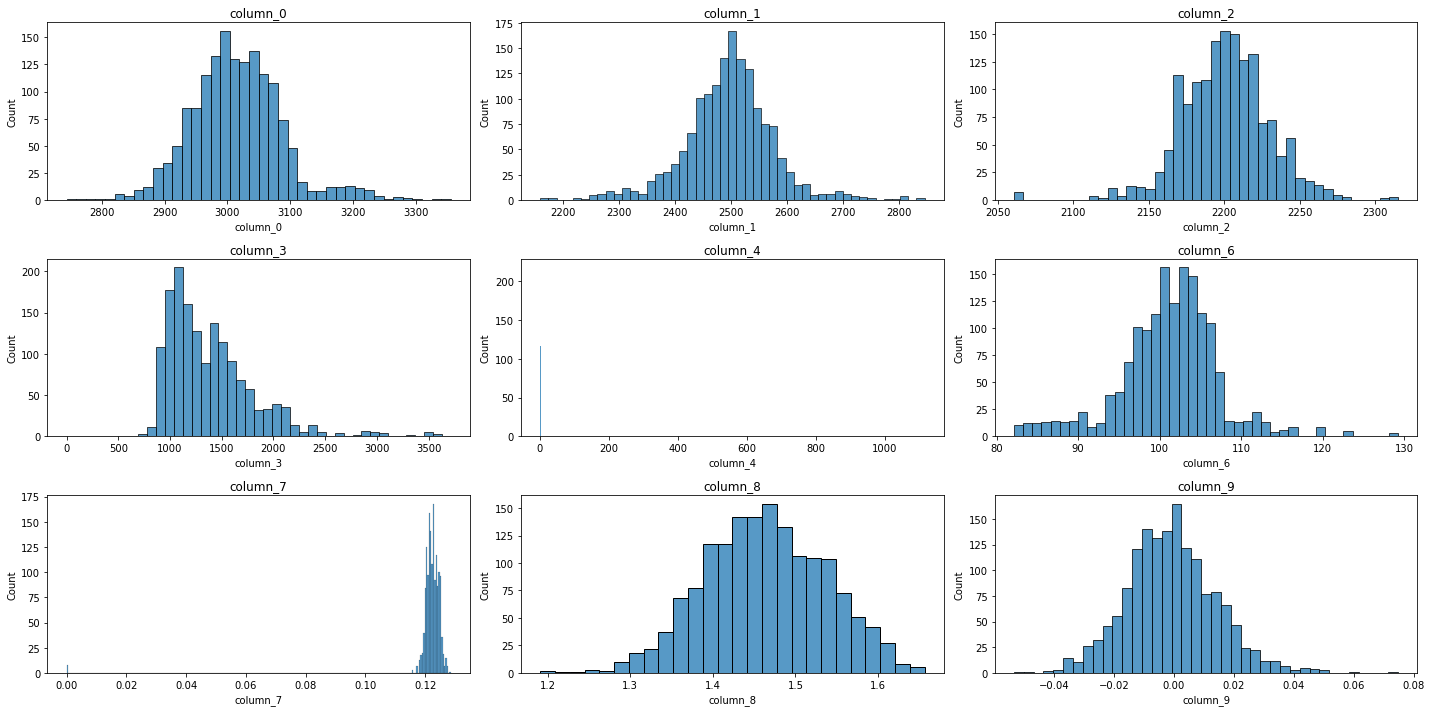

In [155]:
# Lets check some of the columns and see how is their distribution
def check_column_distributions(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize=(20,10))
    for i, col_name in enumerate(columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(df[col_name], ax=ax)
        ax.set_title(col_name)
    fig.tight_layout()
    plt.show()

check_column_distributions(dataset, dataset.iloc[:,1:10], 3, 3)

<b>It seems many of the columns are right skewed with loong tails on the left </b>

<b> Lets break the Time field into multiple columns </b>

In [156]:
dataset.head()

,Time,column_0,column_1,column_2,column_3,column_4,column_6,column_7,column_8,column_9,...,column_565,column_570,column_571,column_572,column_582,column_583,column_586,column_587,column_589,Result
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,0.14561,533.8500,2.1113,8.95,0.5005,0.0118,0.021458,0.016475,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,0.14561,535.0164,2.4335,5.92,0.5019,0.0223,0.009600,0.020100,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,0.62190,535.0245,2.0293,11.21,0.4958,0.0157,0.058400,0.048400,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,0.16300,530.5682,2.0253,9.33,0.4990,0.0103,0.020200,0.014900,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,0.14561,532.0155,2.0275,8.83,0.4800,0.4766,0.020200,0.014900,73.843200,-1


In [157]:
from datetime import datetime

In [158]:
dataset['year'] = pd.DatetimeIndex(dataset['Time']).year
dataset['month'] = pd.DatetimeIndex(dataset['Time']).month
dataset['date'] = pd.DatetimeIndex(dataset['Time']).day
dataset['time'] = pd.DatetimeIndex(dataset['Time']).time
dataset['hour'] = pd.DatetimeIndex(dataset['Time']).hour
dataset['min'] = pd.DatetimeIndex(dataset['Time']).minute

In [159]:
dataset.head()

,Time,column_0,column_1,column_2,column_3,column_4,column_6,column_7,column_8,column_9,...,column_586,column_587,column_589,Result,year,month,date,time,hour,min
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,0.021458,0.016475,99.670066,-1,2008,7,19,11:55:00,11,55
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,0.009600,0.020100,208.204500,-1,2008,7,19,12:32:00,12,32
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,0.058400,0.048400,82.860200,1,2008,7,19,13:17:00,13,17
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,0.020200,0.014900,73.843200,-1,2008,7,19,14:43:00,14,43
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,0.020200,0.014900,73.843200,-1,2008,7,19,15:22:00,15,22


In [160]:
dataset.drop(columns=['Time'], inplace=True)

In [161]:
dataset.head()

,column_0,column_1,column_2,column_3,column_4,column_6,column_7,column_8,column_9,column_10,...,column_586,column_587,column_589,Result,year,month,date,time,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.021458,0.016475,99.670066,-1,2008,7,19,11:55:00,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.009600,0.020100,208.204500,-1,2008,7,19,12:32:00,12,32
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.058400,0.048400,82.860200,1,2008,7,19,13:17:00,13,17
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.020200,0.014900,73.843200,-1,2008,7,19,14:43:00,14,43
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.020200,0.014900,73.843200,-1,2008,7,19,15:22:00,15,22


In [162]:
dataset.year.unique()

array([2008], dtype=int64)

<b> The dataset contains the data for year 2008 only </b>

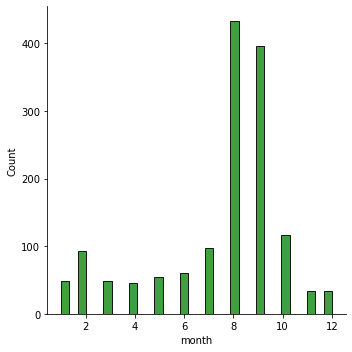

In [163]:
sns.displot(dataset[dataset.Result == -1]['month'], color = 'g');

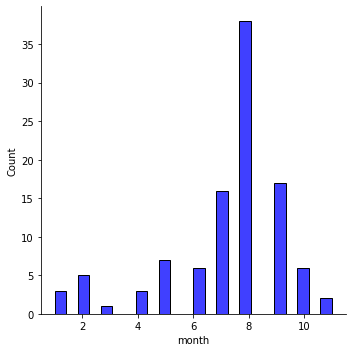

In [164]:
sns.displot(dataset[dataset.Result == 1]['month'], color = 'b');

<b> It seems months of August has the highest production and highest failures as well </b>

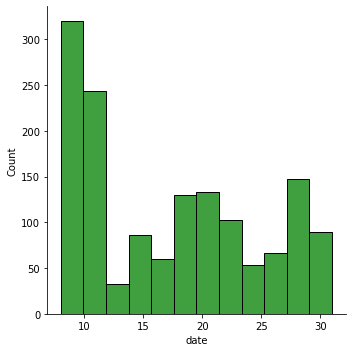

In [165]:
sns.displot(dataset[dataset.Result == -1]['date'], color = 'g');

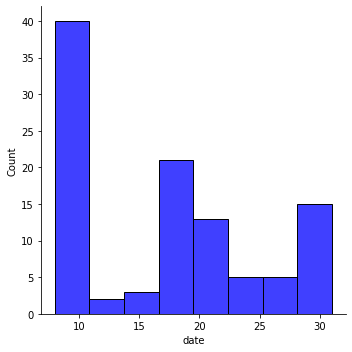

In [166]:
sns.displot(dataset[dataset.Result == 1]['date'], color = 'b');

<b> It seems the starting days have higher production and failure instances </b>

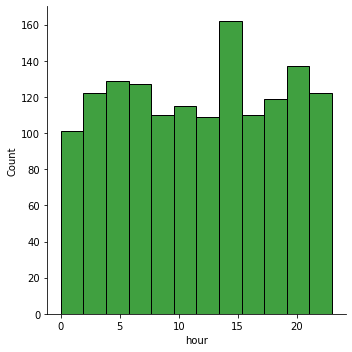

In [167]:
sns.displot(dataset[dataset.Result == -1]['hour'], color = 'g');

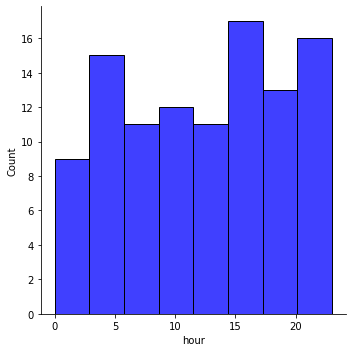

In [168]:
sns.displot(dataset[dataset.Result == 1]['hour'], color = 'b');

<b>It seems the production is almost equally distributed over all working hours with highest production arond 2:00 - 3:00 PM respectively </b>

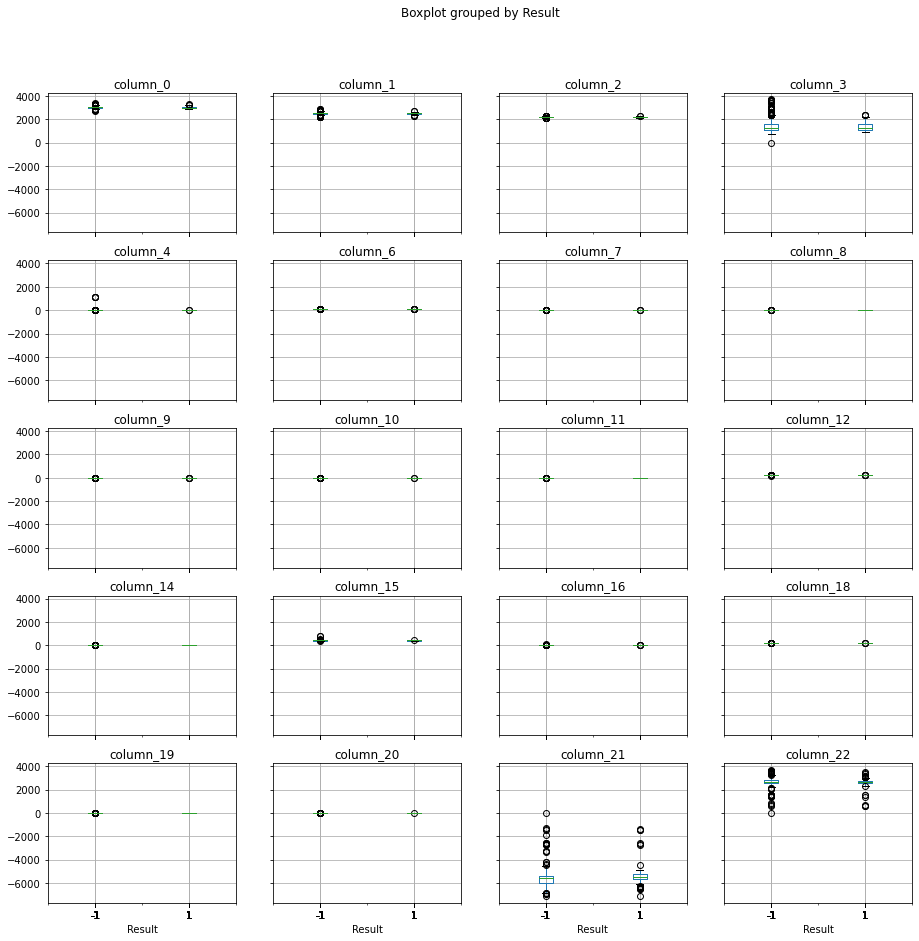

In [169]:
# Lets view bolxplot for some of the dataset columns and figure our the outlier distribution
columns_list = dataset.columns.tolist()
dataset.boxplot(column = columns_list[0:20], by='Result', figsize = (15,15));

<b>It seems many of the feature/columns have outliers and some of them have very similar values </b>

In [170]:
#Lets check how many columns are there which have very low variablity

In [171]:
dataset.std()[dataset.std() < 0.1]

column_7      0.008936
column_8      0.073849
column_9      0.015107
column_10     0.009296
column_11     0.012444
                ...   
column_582    0.003403
column_583    0.017174
column_586    0.012354
column_587    0.008805
year          0.000000
Length: 83, dtype: float64

<b> It seems there are 83 columns which have less than 0.1 Standard deviation. Lets drop them </b>

In [172]:
dataset.drop(dataset.std()[dataset.std() < 0.1].index.values, axis=1, inplace=True)

In [173]:
dataset.head(2)

,column_0,column_1,column_2,column_3,column_4,column_6,column_12,column_14,column_15,column_16,...,column_570,column_571,column_572,column_589,Result,month,date,time,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.4396,7.9558,414.8710,10.0433,...,533.8500,2.1113,8.95,99.670066,-1,7,19,11:55:00,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.5470,10.1548,414.7347,9.2599,...,535.0164,2.4335,5.92,208.204500,-1,7,19,12:32:00,12,32


In [174]:
dataset['result'] = dataset['Result']

In [175]:
dataset.drop(['Result'], axis=1, inplace=True)

In [176]:
dataset.head(2)

,column_0,column_1,column_2,column_3,column_4,column_6,column_12,column_14,column_15,column_16,...,column_570,column_571,column_572,column_589,month,date,time,hour,min,result
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.4396,7.9558,414.8710,10.0433,...,533.8500,2.1113,8.95,99.670066,7,19,11:55:00,11,55,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.5470,10.1548,414.7347,9.2599,...,535.0164,2.4335,5.92,208.204500,7,19,12:32:00,12,32,-1


### 4. Data pre-processing:
#### A. Segregate predictors vs target attributes
#### B. Check for target balancing and fix it if found imbalanced
#### C. Perform train-test split and standardise the data or vice versa if required
#### D. Check if the train and test data have similar statistical characteristics when compared with original data

In [177]:
target_variable = dataset.result

In [178]:
dataset.drop(columns=['time', 'result'], inplace=True)

In [179]:
from scipy import stats
dataset_copy = dataset.copy()

def outlier_removal_max(var):
    var = np.where(var > var.quantile(0.75)+ stats.iqr(var),var.quantile(0.50),var)
    return var

def outlier_removal_min(var):
    var = np.where(var < var.quantile(0.25) - stats.iqr(var),var.quantile(0.50),var)
    return var

#Loop over the columns and remove the outliers on min and max side
for column in dataset_copy:
    dataset_copy[column] = outlier_removal_max(dataset_copy[column])
    dataset_copy[column] = outlier_removal_min(dataset_copy[column])

In [180]:
dataset = dataset_copy

In [181]:
dataset.std()[dataset.std() < 0.1]

column_19     0.055843
column_31     0.059290
column_67     0.092254
column_74     0.000000
column_120    0.078332
column_175    0.092670
column_177    0.090468
column_184    0.041712
column_195    0.036658
column_521    0.000000
column_563    0.093520
dtype: float64

In [182]:
dataset.drop(dataset.std()[dataset.std() < 0.1].index.values, axis=1, inplace=True)

In [190]:
dataset

,column_0,column_1,column_2,column_3,column_4,column_6,column_12,column_14,column_15,column_16,...,column_562,column_564,column_570,column_571,column_572,column_589,month,date,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.439600,7.955800,414.871000,10.043300,...,262.729683,6.444985,533.8500,2.1113,8.95,99.670066,7.0,19.0,11.0,55.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.547000,10.154800,414.734700,9.259900,...,262.729683,6.444985,535.0164,2.4335,5.92,72.023000,7.0,19.0,12.0,32.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,202.017900,9.515700,416.707500,9.314400,...,267.064000,6.290000,535.0245,2.0293,11.21,82.860200,7.0,19.0,13.0,17.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,201.848200,9.605200,422.289400,9.692400,...,264.272000,7.320000,530.5682,2.0253,9.33,73.843200,7.0,19.0,14.0,43.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,201.942400,10.566100,420.592500,10.338700,...,262.729683,6.444985,532.0155,2.0275,8.83,73.843200,7.0,19.0,15.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,1287.3538,1.4843,101.4922,203.986700,11.769200,419.340400,10.239700,...,264.272000,4.980000,536.3418,2.0153,7.98,72.023000,10.0,16.0,15.0,13.0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,204.017300,9.162000,405.817800,10.228500,...,266.832000,4.560000,537.9264,2.1814,5.48,72.023000,10.0,16.0,20.0,49.0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,199.956809,9.005371,413.086035,9.907603,...,264.272000,6.290000,530.3709,2.3435,6.49,43.523100,10.0,17.0,5.0,26.0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,197.244800,9.735400,401.915300,9.863000,...,264.272000,4.980000,534.3936,1.9098,9.13,93.494100,10.0,17.0,6.0,1.0


In [138]:
# lets Scale the data
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()

In [191]:
scaled_dataset = pd.DataFrame(minMaxScaler.fit_transform(dataset), columns=dataset.columns)

In [192]:
scaled_dataset

,column_0,column_1,column_2,column_3,column_4,column_6,column_12,column_14,column_15,column_16,...,column_562,column_564,column_570,column_571,column_572,column_589,month,date,hour,min
0,0.563402,0.762269,0.382713,0.508999,0.503300,0.281545,0.702017,0.401549,0.557580,0.601290,...,0.377657,0.478721,0.597123,0.474245,0.487004,0.510140,0.333333,0.478261,0.478261,0.932203
1,0.817836,0.364602,0.775235,0.547194,0.109677,0.535528,0.536943,0.601719,0.553996,0.110715,...,0.377657,0.478721,0.710355,0.835821,0.072503,0.351183,0.333333,0.478261,0.521739,0.542373
2,0.177652,0.745937,0.370556,0.717580,0.614535,0.167414,0.665236,0.543543,0.605872,0.144843,...,0.962743,0.453355,0.711142,0.382224,0.796170,0.413492,0.333333,0.478261,0.565217,0.288136
3,0.397795,0.423974,0.486616,0.144511,0.473786,0.637196,0.650435,0.551690,0.752652,0.381552,...,0.585853,0.621931,0.278529,0.377735,0.538988,0.361648,0.333333,0.478261,0.608696,0.728814
4,0.568542,0.516372,0.802309,0.447487,0.631739,0.431003,0.658651,0.639158,0.708031,0.786273,...,0.377657,0.478721,0.419031,0.380204,0.470588,0.361648,0.333333,0.478261,0.652174,0.372881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.047395,0.361464,0.309154,0.419012,0.595328,0.489827,0.836957,0.748673,0.675106,0.724278,...,0.585853,0.238953,0.839024,0.366513,0.354309,0.351183,0.833333,0.347826,0.652174,0.220339
1563,0.647285,0.595535,0.482326,0.300727,0.144457,0.327488,0.839626,0.511347,0.319519,0.717265,...,0.931425,0.170213,0.992855,0.552912,0.012312,0.351183,0.833333,0.347826,0.869565,0.830508
1564,0.358914,0.021239,0.553433,0.290430,0.105376,0.378139,0.485465,0.497089,0.510643,0.516315,...,0.585853,0.453355,0.259375,0.734822,0.150479,0.187323,0.833333,0.391304,0.217391,0.440678
1565,0.029779,0.633588,0.284327,0.343673,0.660808,0.345148,0.248921,0.563542,0.216900,0.488384,...,0.585853,0.238953,0.649895,0.248120,0.511628,0.474631,0.833333,0.391304,0.260870,0.016949


In [199]:
scaled_dataset['result'] = target_variable

In [200]:
scaled_dataset

,column_0,column_1,column_2,column_3,column_4,column_6,column_12,column_14,column_15,column_16,...,column_564,column_570,column_571,column_572,column_589,month,date,hour,min,result
0,0.563402,0.762269,0.382713,0.508999,0.503300,0.281545,0.702017,0.401549,0.557580,0.601290,...,0.478721,0.597123,0.474245,0.487004,0.510140,0.333333,0.478261,0.478261,0.932203,-1
1,0.817836,0.364602,0.775235,0.547194,0.109677,0.535528,0.536943,0.601719,0.553996,0.110715,...,0.478721,0.710355,0.835821,0.072503,0.351183,0.333333,0.478261,0.521739,0.542373,-1
2,0.177652,0.745937,0.370556,0.717580,0.614535,0.167414,0.665236,0.543543,0.605872,0.144843,...,0.453355,0.711142,0.382224,0.796170,0.413492,0.333333,0.478261,0.565217,0.288136,1
3,0.397795,0.423974,0.486616,0.144511,0.473786,0.637196,0.650435,0.551690,0.752652,0.381552,...,0.621931,0.278529,0.377735,0.538988,0.361648,0.333333,0.478261,0.608696,0.728814,-1
4,0.568542,0.516372,0.802309,0.447487,0.631739,0.431003,0.658651,0.639158,0.708031,0.786273,...,0.478721,0.419031,0.380204,0.470588,0.361648,0.333333,0.478261,0.652174,0.372881,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.047395,0.361464,0.309154,0.419012,0.595328,0.489827,0.836957,0.748673,0.675106,0.724278,...,0.238953,0.839024,0.366513,0.354309,0.351183,0.833333,0.347826,0.652174,0.220339,-1
1563,0.647285,0.595535,0.482326,0.300727,0.144457,0.327488,0.839626,0.511347,0.319519,0.717265,...,0.170213,0.992855,0.552912,0.012312,0.351183,0.833333,0.347826,0.869565,0.830508,-1
1564,0.358914,0.021239,0.553433,0.290430,0.105376,0.378139,0.485465,0.497089,0.510643,0.516315,...,0.453355,0.259375,0.734822,0.150479,0.187323,0.833333,0.391304,0.217391,0.440678,-1
1565,0.029779,0.633588,0.284327,0.343673,0.660808,0.345148,0.248921,0.563542,0.216900,0.488384,...,0.238953,0.649895,0.248120,0.511628,0.474631,0.833333,0.391304,0.260870,0.016949,-1


In [204]:
X = scaled_dataset.iloc[:,:-1]

In [207]:
y = scaled_dataset['result']

In [209]:
from sklearn.model_selection import train_test_split

In [222]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '-1': {} \n".format(sum(y == -1)))

Before OverSampling, counts of label '1': 104
Before OverSampling, counts of label '-1': 1463 



In [215]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

In [223]:
X_res, y_res = sm.fit_resample(X, y)

In [224]:
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '-1': {} \n".format(sum(y_res == -1)))

After OverSampling, counts of label '1': 1463
After OverSampling, counts of label '-1': 1463 



In [225]:
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 0)